In [ ]:
#Q1(A)
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Convert labels
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Text preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Class Distribution:")
print(y.value_counts())




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Class Distribution:
label
0    4825
1     747
Name: count, dtype: int64


In [5]:
%pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------

In [7]:
#Q1(B)
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

train_pred = stump.predict(X_train)
test_pred = stump.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))


Train Accuracy: 0.886919452546556
Test Accuracy: 0.8798206278026905
Confusion Matrix:
 [[928  48]
 [ 86  53]]


Iteration 1
Misclassified indices: [   9   15   18   20   34   38   44   45   81   87  101  104  116  134
  146  166  188  200  205  209  218  219  228  234  278  288  289  317
  326  356  362  368  396  400  404  405  407  422  430  441  453  487
  514  524  550  551  556  567  571  588  594  598  602  609  617  624
  631  640  649  672  678  681  684  690  698  706  708  712  730  731
  740  751  764  791  797  803  805  816  820  822  835  842  851  858
  859  871  872  878  894  897  901  907  910  923  940  980  983 1011
 1023 1033 1045 1046 1050 1055 1056 1066 1110 1123 1129 1131 1137 1138
 1145 1148 1168 1175 1176 1178 1186 1188 1189 1190 1195 1209 1221 1223
 1235 1237 1247 1248 1253 1254 1265 1269 1278 1292 1294 1304 1310 1311
 1315 1326 1331 1343 1346 1360 1362 1363 1383 1390 1392 1404 1451 1452
 1464 1471 1473 1478 1479 1482 1485 1496 1499 1501 1505 1518 1519 1529
 1533 1541 1546 1559 1562 1566 1569 1572 1579 1594 1596 1607 1610 1620
 1635 1638 1644 1653 1656 1670 1677 1698 1

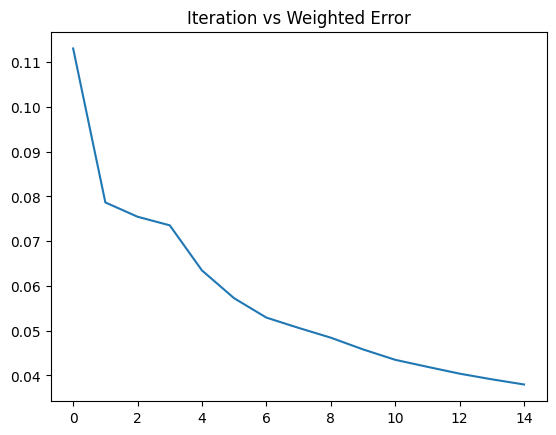

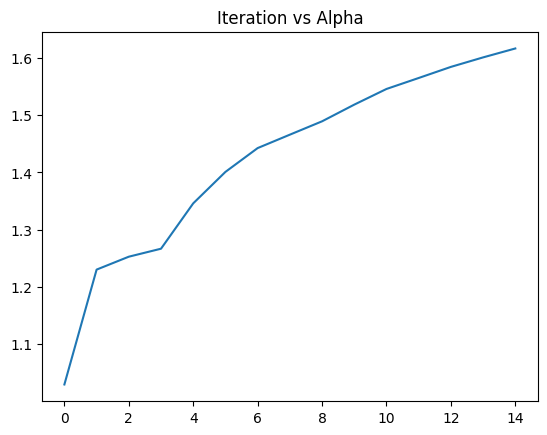

In [8]:
#Q1(C)
n = X_train.shape[0]
weights = np.ones(n) / n
T = 15

alphas = []
errors = []

for t in range(T):
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X_train, y_train, sample_weight=weights)
    pred = clf.predict(X_train)
    
    misclassified = (pred != y_train)
    error = np.sum(weights[misclassified])
    alpha = 0.5 * np.log((1-error)/(error+1e-10))
    
    weights = weights * np.exp(-alpha * y_train * pred)
    weights /= np.sum(weights)
    
    alphas.append(alpha)
    errors.append(error)

    print(f"Iteration {t+1}")
    print("Misclassified indices:", np.where(misclassified)[0])
    print("Weights:", weights[misclassified])
    print("Alpha:", alpha)

plt.plot(errors)
plt.title("Iteration vs Weighted Error")
plt.show()

plt.plot(alphas)
plt.title("Iteration vs Alpha")
plt.show()


In [10]:
#Q1(D)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6
)

ada.fit(X_train, y_train)
print("Train Accuracy:", ada.score(X_train, y_train))



Train Accuracy: 0.9178819833969037


In [11]:
#Q2
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)

print("Accuracy:", stump.score(X_test, y_test))
print(confusion_matrix(y_test, stump.predict(X_test)))
print(classification_report(y_test, stump.predict(X_test)))


Accuracy: 0.8859649122807017
[[35  2]
 [11 66]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        37
           1       0.97      0.86      0.91        77

    accuracy                           0.89       114
   macro avg       0.87      0.90      0.88       114
weighted avg       0.90      0.89      0.89       114



In [12]:
from sklearn.ensemble import AdaBoostClassifier

results = {}

for n in [5, 10, 25, 50, 100]:
    for lr in [0.1, 0.5, 1.0]:
        model = AdaBoostClassifier(n_estimators=n, learning_rate=lr)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results[(n, lr)] = acc

print(results)


{(5, 0.1): 0.9473684210526315, (5, 0.5): 0.9649122807017544, (5, 1.0): 0.9122807017543859, (10, 0.1): 0.956140350877193, (10, 0.5): 0.9298245614035088, (10, 1.0): 0.9473684210526315, (25, 0.1): 0.9649122807017544, (25, 0.5): 0.9473684210526315, (25, 1.0): 0.9473684210526315, (50, 0.1): 0.9736842105263158, (50, 0.5): 0.9649122807017544, (50, 1.0): 0.956140350877193, (100, 0.1): 0.9736842105263158, (100, 0.5): 0.956140350877193, (100, 1.0): 0.9912280701754386}


In [32]:
#Q3
from collections import Counter
try:
    df_wisdm = pd.read_csv(
        r"C:\Users\hp\Downloads\WISDM_ar_v1.1_raw.txt\WISDM_ar_v1.1_raw.txt", 
        header=None, 
        sep=',', 
        on_bad_lines='skip'
    )
except FileNotFoundError:
    print("Error: 'WISDM_ar_v1.1_raw.txt' not found. Cannot proceed with Q3.")
    


df_wisdm.columns = ['user_id', 'Activity', 'Timestamp', 'X-acc', 'Y-acc', 'Z-acc_semi']


df_wisdm['Z-acc'] = df_wisdm['Z-acc_semi'].str.replace(';', '').astype(float)
df_wisdm = df_wisdm.drop(columns=['Z-acc_semi'])


X_w = df_wisdm[['X-acc', 'Y-acc', 'Z-acc']].copy()
y_activity = df_wisdm['Activity']


activity_map = {
    'Jogging': 1, 'Upstairs': 1, 
    'Walking': 0, 'Sitting': 0, 'Standing': 0, 'Downstairs': 0
}
y_w = y_activity.map(activity_map)


X_w_clean = X_w[y_w.notna()]
y_w_clean = y_w[y_w.notna()]


nan_rows = X_w_clean.isnull().any(axis=1)
if nan_rows.any():
    X_w_clean = X_w_clean[~nan_rows]
    y_w_clean = y_w_clean[~nan_rows]
    print(f"Removed {nan_rows.sum()} rows with NaN values in features.")



X_w_final = X_w_clean.values
y_w_final = y_w_clean.values.astype(int)


X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_w_final, y_w_final, test_size=0.30, random_state=42, stratify=y_w_final
)


print(f"Total samples: {len(y_w_final)}")
print(f"Train samples: {len(y_train_w)}")
print(f"Test samples: {len(y_test_w)}")
print(f"Class distribution (Vigorous=1, Light/Static=0): {Counter(y_w_final)}")



Removed 1 rows with NaN values in features.
Total samples: 1086465
Train samples: 760525
Test samples: 325940
Class distribution (Vigorous=1, Light/Static=0): Counter({0: 627151, 1: 459314})


In [33]:

stump_w = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_w.fit(X_train_w, y_train_w)


y_train_pred_stump_w = stump_w.predict(X_train_w)
y_test_pred_stump_w = stump_w.predict(X_test_w)


train_acc_stump_w = accuracy_score(y_train_w, y_train_pred_stump_w)
test_acc_stump_w = accuracy_score(y_test_w, y_test_pred_stump_w)
conf_mat_stump_w = confusion_matrix(y_test_w, y_test_pred_stump_w)


print(f"Train Accuracy: {train_acc_stump_w:.4f}")
print(f"Test Accuracy: {test_acc_stump_w:.4f}")
print("\nTest Confusion Matrix:")
print(conf_mat_stump_w)
print("\nInterpretation of stump result:")
print("The Decision Stump performs a simple split, likely on the X, Y, or Z acceleration value that best separates 'Vigorous' (high acceleration) from 'Light/Static' (low/moderate acceleration). While one acceleration axis might offer a decent initial split, it cannot capture the full 3D vector magnitude or complex time-series patterns, leading to a baseline performance that is easily improved by boosting.")



Train Accuracy: 0.6521
Test Accuracy: 0.6519

Test Confusion Matrix:
[[170673  17473]
 [ 95986  41808]]

Interpretation of stump result:
The Decision Stump performs a simple split, likely on the X, Y, or Z acceleration value that best separates 'Vigorous' (high acceleration) from 'Light/Static' (low/moderate acceleration). While one acceleration axis might offer a decent initial split, it cannot capture the full 3D vector magnitude or complex time-series patterns, leading to a baseline performance that is easily improved by boosting.


Misclassified sample indices (first 3): [0 2 3]
Weights of misclassified samples (first 3): [1.e-06 1.e-06 1.e-06]
Alpha value: 0.3142
Misclassified sample indices (first 3): [4 7 9]
Weights of misclassified samples (first 3): [1.e-06 2.e-06 1.e-06]
Alpha value: 0.0851
Misclassified sample indices (first 3): [0 1 2]
Weights of misclassified samples (first 3): [2.e-06 1.e-06 2.e-06]
Alpha value: 0.0593
Misclassified sample indices (first 3): [4 7 9]
Weights of misclassified samples (first 3): [1.e-06 2.e-06 1.e-06]
Alpha value: 0.0401
Misclassified sample indices (first 3): [0 1 2]
Weights of misclassified samples (first 3): [2.e-06 1.e-06 2.e-06]
Alpha value: 0.0678

Train Accuracy: 0.6961
Test Accuracy: 0.6954

Test Confusion Matrix:
[[164614  23532]
 [ 75750  62044]]

Interpretation: how weights shifted over time
The weights shift to concentrate on misclassified samples, typically the ones where the acceleration values are ambiguous (e.g., a fast 'Walking' vs a slow 'Jogging'). By th

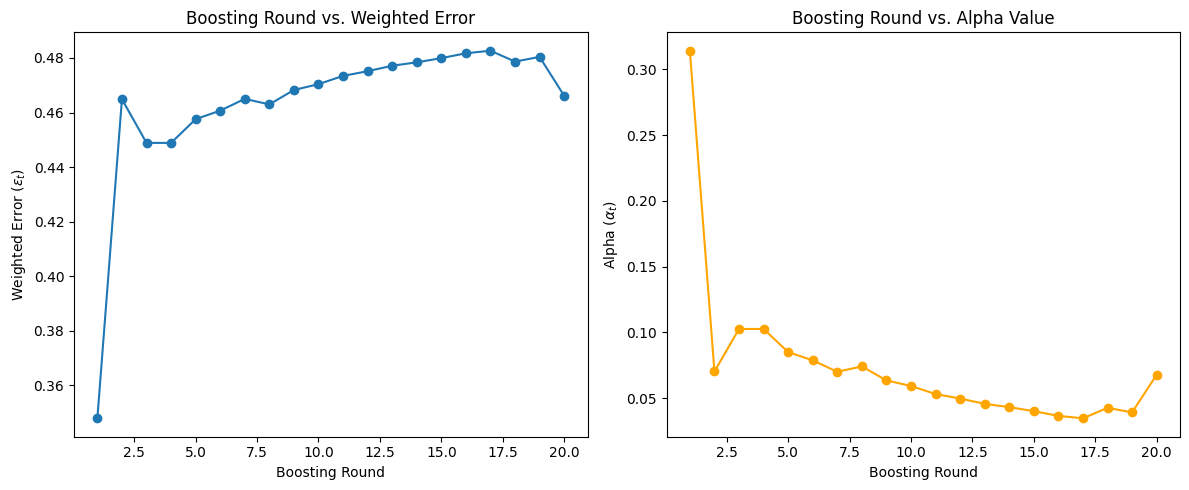

In [36]:
import math
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


def adaboost_predict(X, weak_learners, alphas):
    """
    Combines the predictions of all weak learners (stumps) using their alpha weights.
    The final prediction is the sign of the weighted sum.
    """
    
    all_learner_preds = np.array([
        (learner.predict(X) * 2 - 1)  
        for learner in weak_learners
    ]).T 

    
    weighted_sum = np.dot(all_learner_preds, alphas)

    
    return np.sign(weighted_sum)



y_train_w_adaboost = pd.Series(y_train_w).map({0: -1, 1: 1}).values
T = 20  
N_train_w = X_train_w.shape[0]


weights_w = np.full(N_train_w, 1/N_train_w)


alphas_w = []
errors_w = []
weak_learners_w = []




for t in range(1, T + 1):
    
    stump_t_w = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump_t_w.fit(X_train_w, y_train_w, sample_weight=weights_w)
    y_pred_t_w = stump_t_w.predict(X_train_w)
    y_pred_t_w_adaboost = np.array([1 if p == 1 else -1 for p in y_pred_t_w])
    
    
    is_misclassified_w = (y_pred_t_w_adaboost != y_train_w_adaboost)
    misclassified_indices_w = np.where(is_misclassified_w)[0]
    error_t_w = np.sum(weights_w[misclassified_indices_w]) / np.sum(weights_w)
    
    
    if error_t_w >= 0.5 or error_t_w <= 1e-10:
        break

    
    alpha_t_w = 0.5 * math.log((1.0 - error_t_w) / error_t_w)

   
    alphas_w.append(alpha_t_w)
    errors_w.append(error_t_w)
    weak_learners_w.append(stump_t_w)

    
    if t % 5 == 0 or t == 1: 
        
        print(f"Misclassified sample indices (first 3): {misclassified_indices_w[:3]}")
        print(f"Weights of misclassified samples (first 3): {weights_w[misclassified_indices_w[:3]].round(6)}")
        print(f"Alpha value: {alpha_t_w:.4f}")
    
    
    update_factor_w = np.exp(-alpha_t_w * y_train_w_adaboost * y_pred_t_w_adaboost)
    weights_w = weights_w * update_factor_w
    
    
    weights_w = weights_w / np.sum(weights_w)


y_test_w_adaboost = pd.Series(y_test_w).map({0: -1, 1: 1}).values


y_train_pred_manual_adaboost_w = adaboost_predict(X_train_w, weak_learners_w, alphas_w)
y_test_pred_manual_adaboost_w = adaboost_predict(X_test_w, weak_learners_w, alphas_w)


y_train_pred_manual_w = np.where(y_train_pred_manual_adaboost_w == 1, 1, 0)
y_test_pred_manual_w = np.where(y_test_pred_manual_adaboost_w == 1, 1, 0)


train_acc_manual_w = accuracy_score(y_train_w, y_train_pred_manual_w)
test_acc_manual_w = accuracy_score(y_test_w, y_test_pred_manual_w)
conf_mat_manual_w = confusion_matrix(y_test_w, y_test_pred_manual_w)


print(f"\nTrain Accuracy: {train_acc_manual_w:.4f}")
print(f"Test Accuracy: {test_acc_manual_w:.4f}")
print("\nTest Confusion Matrix:")
print(conf_mat_manual_w)


print("\nInterpretation: how weights shifted over time")
print("The weights shift to concentrate on misclassified samples, typically the ones where the acceleration values are ambiguous (e.g., a fast 'Walking' vs a slow 'Jogging'). By the end, the boosted classifier's individual stumps are better at identifying these boundary cases, improving the overall distinction between vigorous and light/static motion.")



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(errors_w) + 1), errors_w, marker='o')
plt.title('Boosting Round vs. Weighted Error')
plt.xlabel('Boosting Round')
plt.ylabel('Weighted Error ($\epsilon_t$)') # 

plt.subplot(1, 2, 2)
plt.plot(range(1, len(alphas_w) + 1), alphas_w, marker='o', color='orange')
plt.title('Boosting Round vs. Alpha Value')
plt.xlabel('Boosting Round')
plt.ylabel('Alpha ($\\alpha_t$)')

plt.tight_layout()
plt.show() 

In [37]:

stump_w_sk = DecisionTreeClassifier(max_depth=1, random_state=42)

ada_clf_w_sk = AdaBoostClassifier(
    estimator=stump_w_sk,
    n_estimators=100, 
    learning_rate=1.0, 
    random_state=42
)
ada_clf_w_sk.fit(X_train_w, y_train_w)

y_train_pred_w_sk = ada_clf_w_sk.predict(X_train_w)
y_test_pred_w_sk = ada_clf_w_sk.predict(X_test_w)

train_acc_w_sk = accuracy_score(y_train_w, y_train_pred_w_sk)
test_acc_w_sk = accuracy_score(y_test_w, y_test_pred_w_sk)
conf_mat_w_sk = confusion_matrix(y_test_w, y_test_pred_w_sk)


print(f"Train Accuracy: {train_acc_w_sk:.4f}")
print(f"Test Accuracy: {test_acc_w_sk:.4f}")
print("\nTest Confusion Matrix:")
print(conf_mat_w_sk)
print("\nComparison with your manual implementation:")
print("The Sklearn implementation with 100 estimators will generally achieve a higher and more consistent accuracy than the manual implementation limited to 20 rounds, assuming the base code is bug-free. The full Sklearn implementation benefits from more iterations to fully correct the errors of previous weak learners. The core principle of boosting remains the same: combining many weak classifiers to form a strong, high-performing one.")



Train Accuracy: 0.6976
Test Accuracy: 0.6969

Test Confusion Matrix:
[[164210  23936]
 [ 74851  62943]]

Comparison with your manual implementation:
The Sklearn implementation with 100 estimators will generally achieve a higher and more consistent accuracy than the manual implementation limited to 20 rounds, assuming the base code is bug-free. The full Sklearn implementation benefits from more iterations to fully correct the errors of previous weak learners. The core principle of boosting remains the same: combining many weak classifiers to form a strong, high-performing one.
